# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

# Reading the CSV File

In [15]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,spam,email_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Checking for Class Imbalance

[]

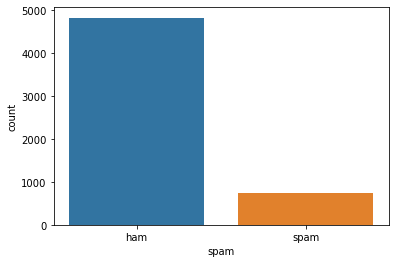

In [18]:
sns.countplot(data=df,x='spam')
plt.plot()

# Only using the important columns

In [16]:
df = df[['spam','email_text']]

# Using Tokenization, Stop words removal, Lemmatization to clean text

# Then using Count Vectoriser to create features

In [24]:
def listToString(s):
    str1 = " "
    return (str1.join(s))

def text_preprocess(text):
    tokens = word_tokenize(text)
    tokens_lemmatized = [wordnet_lemmatizer.lemmatize(w) for w in tokens if not w.lower() in stop_words]
    sentence = listToString(tokens_lemmatized)
    return sentence

df['email_text'] = df['email_text'].apply(text_preprocess)
vector = vectorizer.fit_transform(df['email_text'])
x = pd.DataFrame(vector.toarray(),columns = vectorizer.get_feature_names_out())
y = df['spam'].replace({'ham': 0,'spam': 1})

# Using Oversampling to fix Class Imbalance
# Then using Logistic Regression model for prediction

Precision: 0.9665991902834008
Recall: 0.9896373056994818
fscore: 0.9779825908858167


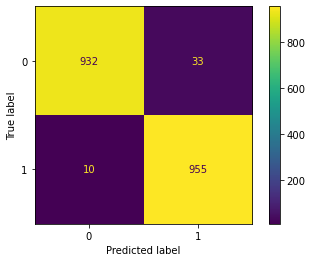

In [25]:
x_oversample, y_oversample = oversampling.fit_resample(x, y)
x_train,x_test,y_train,y_test = train_test_split(x_oversample,y_oversample,
                                                 test_size=0.2,random_state=42,stratify=y_oversample)
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
precision,recall,fscore, _ = precision_recall_fscore_support(y_test, y_pred,average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'fscore: {fscore}')

cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

# We achieve an overall accuracy of 96.6%